In [1]:
import matplotlib as plt
import numpy as np
import pandas as pd
import datetime as dt
import sys
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
df = pd.read_csv('C:/Users/becca/OneDrive/nyc_collisions.csv')

In [2]:
df['ACCIDENT DATE'] = pd.to_datetime(df['ACCIDENT DATE'], format = '%m/%d/%Y')
df['ACCIDENT TIME'] = pd.to_datetime(df['ACCIDENT TIME'], format = '%H:%M')
df['Date'] = df['ACCIDENT DATE'].dt.strftime('%Y - %m/%d')

In [3]:
df['Hour'] = df['ACCIDENT TIME'].dt.hour
df['Day'] = df['ACCIDENT DATE'].dt.day
df['Month'] = df['ACCIDENT DATE'].dt.month
df['Year'] = df['ACCIDENT DATE'].dt.year
df['WeekDay'] = df['ACCIDENT DATE'].dt.strftime('%a')
df['MonthName'] = df['ACCIDENT DATE'].dt.strftime('%b')

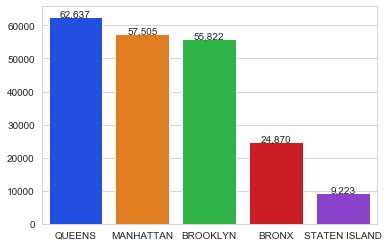

In [4]:
import matplotlib as plt
boroughs = df[(df['CONTRIBUTING FACTOR VEHICLE 1'] =='Driver Inattention/Distraction')|(df['CONTRIBUTING FACTOR VEHICLE 2'] =='Driver Inattention/Distraction')|(df['CONTRIBUTING FACTOR VEHICLE 3'] =='Driver Inattention/Distraction')|(df['CONTRIBUTING FACTOR VEHICLE 4'] =='Driver Inattention/Distraction')|(df['CONTRIBUTING FACTOR VEHICLE 5'] =='Driver Inattention/Distraction')].BOROUGH.dropna().values.astype(str)
values, frequencies = np.unique(boroughs, return_counts=True)
count_sort_ind = np.argsort(-frequencies)
#plt.title(r'Driver Inattention/Distration by Borough')
sns.set_style("whitegrid")
axes = sns.barplot(values[count_sort_ind], frequencies[count_sort_ind], palette='bright') 
for p in axes.patches:
    height = p.get_height()
    axes.text(p.get_x()+p.get_width()/2.,
            height,
            '{:,.0f}'.format(height),
            ha="center") 

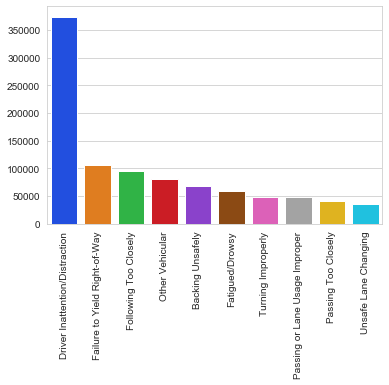

In [7]:
confacts1 = df[df['CONTRIBUTING FACTOR VEHICLE 1']!='Unspecified']['CONTRIBUTING FACTOR VEHICLE 1']
confacts2= df[df['CONTRIBUTING FACTOR VEHICLE 2']!='Unspecified']['CONTRIBUTING FACTOR VEHICLE 2']
confacts3= df[df['CONTRIBUTING FACTOR VEHICLE 3']!='Unspecified']['CONTRIBUTING FACTOR VEHICLE 3']
confacts4= df[df['CONTRIBUTING FACTOR VEHICLE 4']!='Unspecified']['CONTRIBUTING FACTOR VEHICLE 4']
confacts5= df[df['CONTRIBUTING FACTOR VEHICLE 5']!='Unspecified']['CONTRIBUTING FACTOR VEHICLE 5']
confacts1 = confacts1.append(confacts2.append(confacts3.append(confacts4.append(confacts5))))
values, frequencies = np.unique(confacts1.dropna().values.astype(str), return_counts=True)
count_sort_ind = np.argsort(-frequencies)
#plt.title(f'Top 10 Contributing Factors to Collisions')
sns.set_style("whitegrid")
axes = sns.barplot(values[count_sort_ind][:10], frequencies[count_sort_ind][:10], palette='bright')
for tick in axes.get_xticklabels():
    tick.set_rotation(90)

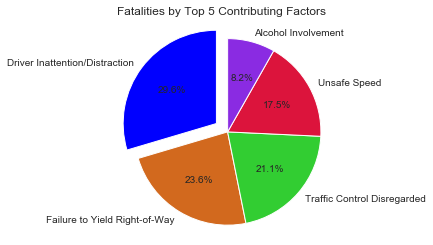

In [8]:
deathpie = df[(df['CONTRIBUTING FACTOR VEHICLE 1'] !='Unspecified') & (df['NUMBER OF PERSONS KILLED'] >0)]['CONTRIBUTING FACTOR VEHICLE 1']
deathpie2 = df[(df['CONTRIBUTING FACTOR VEHICLE 2'] !='Unspecified') & (df['NUMBER OF PERSONS KILLED'] >0)]['CONTRIBUTING FACTOR VEHICLE 2']
deathpie3 = df[(df['CONTRIBUTING FACTOR VEHICLE 3'] !='Unspecified') & (df['NUMBER OF PERSONS KILLED'] >0)]['CONTRIBUTING FACTOR VEHICLE 3']
deathpie4 = df[(df['CONTRIBUTING FACTOR VEHICLE 4'] !='Unspecified') & (df['NUMBER OF PERSONS KILLED'] >0)]['CONTRIBUTING FACTOR VEHICLE 4']
deathpie5 = df[(df['CONTRIBUTING FACTOR VEHICLE 5'] !='Unspecified') & (df['NUMBER OF PERSONS KILLED'] >0)]['CONTRIBUTING FACTOR VEHICLE 5']
deathpie2 = confacts1.append(deathpie2.append(deathpie3.append(deathpie4.append(deathpie5))))
values, frequencies = np.unique(deathpie.dropna().values.astype(str), return_counts=True)
count_sort_ind = np.argsort(-frequencies)
sns.set_style("whitegrid")


import matplotlib.pyplot as plt
from matplotlib import cm
cmap=plt.get_cmap('Accent')
cs=cm.Set1(np.arange(40)/40.)

explode = (0.15, 0, 0, 0, 0) 

fig1, ax1 = plt.subplots()
colors = ['blue', 'chocolate', 'limegreen', 'crimson', 'blueviolet']
ax1.pie(frequencies[count_sort_ind][:5], explode = explode, colors = colors, labels=values[count_sort_ind][:5], autopct='%1.1f%%', shadow=False, startangle=90)
ax1.axis('equal') 

plt.title('Fatalities by Top 5 Contributing Factors')
plt.show()

Text(0.5, 1.0, 'Driver Inattention / Distraction Collision Events by Date 2013 - 2018')

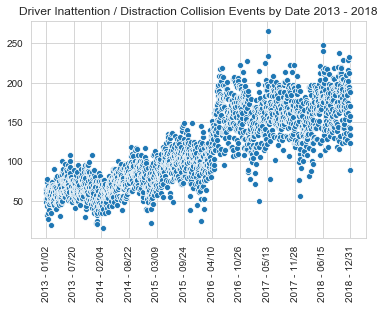

In [9]:
confacts1 = df[((df['CONTRIBUTING FACTOR VEHICLE 1'] =='Driver Inattention/Distraction')|(df['CONTRIBUTING FACTOR VEHICLE 2'] =='Driver Inattention/Distraction')|(df['CONTRIBUTING FACTOR VEHICLE 3'] =='Driver Inattention/Distraction')|(df['CONTRIBUTING FACTOR VEHICLE 4'] =='Driver Inattention/Distraction')|(df['CONTRIBUTING FACTOR VEHICLE 5'] =='Driver Inattention/Distraction'))&(df['Year'] != 2012)&(df['Year'] != 2019)]['Date'].dropna().values.astype(str)
values, frequencies = np.unique(confacts1, return_counts=True)
sns.set_style("whitegrid")
count_sort_ind = np.argsort(values)
ticksmax = (len(values)/11)*11
ax= sns.scatterplot(values[count_sort_ind], frequencies[count_sort_ind], palette='bright')
ax.set(xticks=np.arange(1, ticksmax, int(ticksmax/11)))
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
confacts1 = df[((df['CONTRIBUTING FACTOR VEHICLE 1'] =='Driver Inattention/Distraction')|(df['CONTRIBUTING FACTOR VEHICLE 2'] =='Driver Inattention/Distraction')|(df['CONTRIBUTING FACTOR VEHICLE 3'] =='Driver Inattention/Distraction')|(df['CONTRIBUTING FACTOR VEHICLE 4'] =='Driver Inattention/Distraction')|(df['CONTRIBUTING FACTOR VEHICLE 5'] =='Driver Inattention/Distraction'))&(df['Year'] != 2012)&(df['Year'] != 2019)]['Date'].dropna().values.astype(str)
values, frequencies = np.unique(confacts1, return_counts=True)
sns.set_style("whitegrid")
count_sort_ind = np.argsort(values)
plt.title(r'Driver Inattention / Distraction Collision Events by Date 2013 - 2018')
